In [174]:
import pandas as pd
import numpy as np

data = pd.read_csv("mental_health_dataset.csv")
data.shape

(1000, 12)

1000 строк, 12 столбцов

In [175]:
data.dtypes

User_ID                      int64
Age                          int64
Gender                      object
Occupation                  object
Country                     object
Mental_Health_Condition     object
Severity                    object
Consultation_History        object
Stress_Level                object
Sleep_Hours                float64
Work_Hours                   int64
Physical_Activity_Hours      int64
dtype: object

Количественные признаки: Age, Sleep_Hours, Work_Hours, Physical_Activity_Hours

Категориальные признаки: Gender, Occupation, Country, Mental_Health_Condition, Severity, 
Consultation_History, Stress_Level

Номинальные: Severity, Stress_Level

In [176]:
data.isna().sum()

User_ID                      0
Age                          0
Gender                       0
Occupation                   0
Country                      0
Mental_Health_Condition      0
Severity                   501
Consultation_History         0
Stress_Level                 0
Sleep_Hours                  0
Work_Hours                   0
Physical_Activity_Hours      0
dtype: int64

В колонке severity 501 пропуск, колонку необходимо удалить, так как пропусков более 40%

In [177]:
# Удаляем колонку 'Severity'
df = data.drop('Severity', axis = 1)

df[df.duplicated()].shape[0]

0

В данных отсутствуют полные дубликаты

In [178]:
# Определение выбросов методом IQR (межквартильный размах)
q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
iqr = q3-q1
low1 = q1 - iqr*1.5
up1 = q3 + iqr*1.5
print(df[(df['Age']<low1) | (df['Age']>up1)].shape[0])

q1a=df['Sleep_Hours'].quantile(0.25)
q3a=df['Sleep_Hours'].quantile(0.75)
iqra = q3a-q1a
low2 = q1a - iqra*1.5
up2 = q3a + iqra*1.5
print(df[(df['Sleep_Hours']<low2) | (df['Sleep_Hours']>up2)].shape[0])

q1b=df['Work_Hours'].quantile(0.25)
q3b=df['Work_Hours'].quantile(0.75)
iqrb = q3b-q1b
low3 = q1b - iqrb*1.5
up3 = q3b + iqrb*1.5
print(df[(df['Work_Hours']<low3) | (df['Work_Hours']>up3)].shape[0])

q1c=df['Physical_Activity_Hours'].quantile(0.25)
q3c=df['Physical_Activity_Hours'].quantile(0.75)
iqrc = q3c-q1c
low4 = q1c - iqrc*1.5
up4 = q3c + iqrc*1.5
print(df[(df['Physical_Activity_Hours']<low4) | (df['Physical_Activity_Hours']>up4)].shape[0])

0
0
0
0


В столбцах Age, Sleep_Hours, Work_Hours и Physical_Activity_Hours отсутствуют выбросы (количество выбросов = 0)

In [179]:
df_no_userid = df.drop(df.columns[0], axis=1)
df_no_userid.describe()

,Age,Sleep_Hours,Work_Hours,Physical_Activity_Hours
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.89200,7.095600,54.621000,5.134000
std,13.97475,1.713861,14.709035,3.081808
min,18.00000,4.000000,30.000000,0.000000
25%,30.00000,5.600000,42.000000,3.000000
50%,42.00000,7.100000,55.000000,5.000000
75%,54.00000,8.500000,67.000000,8.000000
max,65.00000,10.000000,80.000000,10.000000


1. Age: Минимальный возраст 18 лет и максимальный 65 лет говорят о широком диапазоне возрастов, что позволяет анализировать ментальное здоровье в разных жизненных фазах.
2. Sleep_Hours: Среднее значение Sleep_Hours приблизительно равно 7, что означает, что в среднем люди соблюдают 
рекомендации по здоровому сну (7-8 часов), тем не менее 50% опрошенных спят менее 7.1 часов, что может негативно сказываться на их ментальном здоровье 
3. Work_Hours: По данным на 2024 год, в среднем по миру продолжительность рабочей недели может варьироваться от менее 40 до почти 50 часов. Тем не менее, в среднем люди работают 54.6 часов в неделю (50% работают более 55 часов). Переработки и слишком напряженный график могут стать причиной депрессивных состояний, связанных именно с переутомлением.

In [180]:
df.describe(include = 'object')

,Gender,Occupation,Country,Mental_Health_Condition,Consultation_History,Stress_Level
count,1000,1000,1000,1000,1000,1000
unique,4,7,7,2,2,3
top,Female,Other,Australia,Yes,No,High
freq,270,161,160,515,505,342


In [181]:
df['Stress_Level'].value_counts().sort_index()

Stress_Level
High      342
Low       338
Medium    320
Name: count, dtype: int64

Выборка достаточно репрезентативна, так как включает людей разных профессий, полов, с разным уровнем стресса, проживающих в разных странах, имеющих и не имеющих проблем с ментальным здоровьем
1. Stress_Level: Несмотря на то, что количество респондентов, имеющих сильный, средний и низкий уровни стресса распределено равномерно, больше всего людей (342) имеют высокий уровень стресса. Сильный стресс может быть вызван внешними или внутренними факторами, такими как тяжелая работа, недосып или психоэмоциональное состояние (например, депрессии или тревожные расстройства). 
2. Mental_Health_Condition/Consultation_History: количество людей, заявивших о наличии ментальных проблем составляет 515, однако лишь 495 человек консультировались с психологами и психотерапевтами (Consultation_History: freq 505, top No). Можно сделать вывод, что не все люди, осознающие наличие психических проблем обращаются за помощью и консультацией. Это подчеркивает важность повышения осведомленности о значении психического здоровья, устранения стигматизации в отношении ментальных проблем и улучшения доступа к услугам психологов и психотерапевтов для более широких слоев населения. 

Text(0.5, 1.0, 'Наличие ментальных проблем')

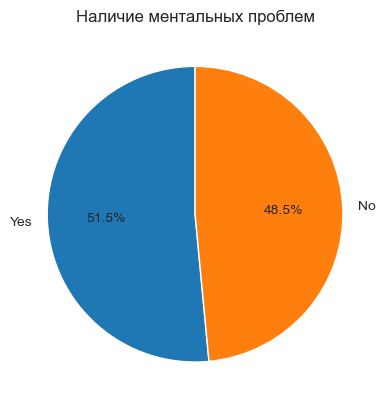

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

mental_health = df['Mental_Health_Condition'].value_counts()
plt.pie(mental_health.values, labels=mental_health.index, autopct='%1.1f%%', startangle=90)
plt.title('Наличие ментальных проблем')

На основании круговой диаграммы можно сделать вывод, что более половины опрошенных заявили о наличии ментальных проблем. Это может свидетельствовать о растущем внимании к вопросам ментального здоровья.

Text(0, 0.5, 'Количество человек')

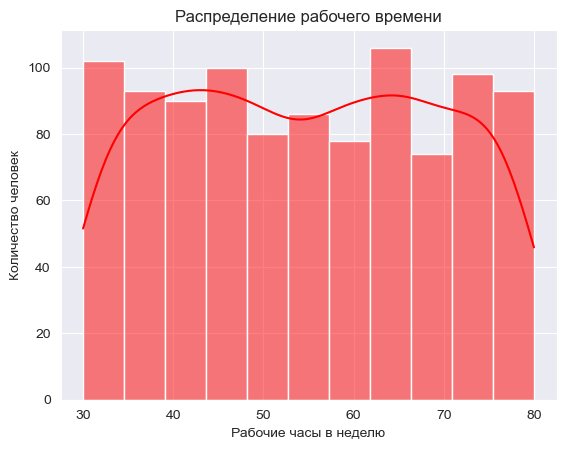

In [183]:
sns.histplot(df['Work_Hours'], kde=True, color='red')
plt.title('Распределение рабочего времени')
plt.xlabel('Рабочие часы в неделю')
plt.ylabel('Количество человек')

Гистограмма достаточно однородна. На основании графика можно сделать вывод, что многие сотрудники работают значительно больше стандартного рабочего времени, большое количество сотрудников работает в районе 65 часов в неделю.

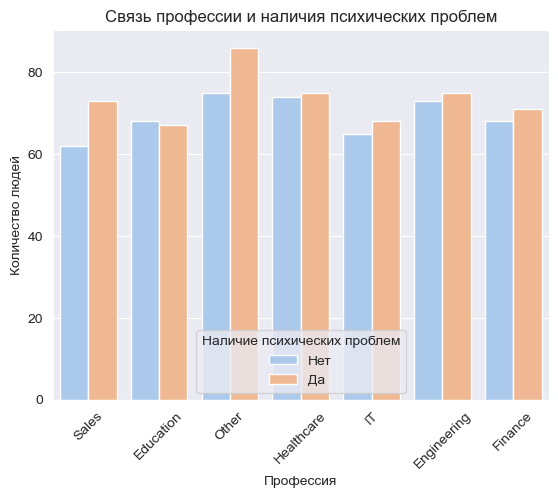

In [184]:
sns.countplot(x='Occupation', hue='Mental_Health_Condition', data=df, palette='pastel')
plt.title('Связь профессии и наличия психических проблем')
plt.xlabel('Профессия')
plt.ylabel('Количество людей')
plt.xticks(rotation=45)
plt.legend(title='Наличие психических проблем', labels=['Нет', 'Да'], loc='lower center') 

Датасет охватывает большое количество профессий из разных сфер, несмотря на то, что количество людей, работающих в медицине, IT, инженеринге и финансах, с диагностированными психическими расстройствами и не имеющиими их,  распределены примерно одинаково, в продажах и других работников с психическими проблемами больше, чем без них. Единственная сфера, в которой количество людей без психических проблем превосходит число людей с ментальными проблемами - это образование (education). 

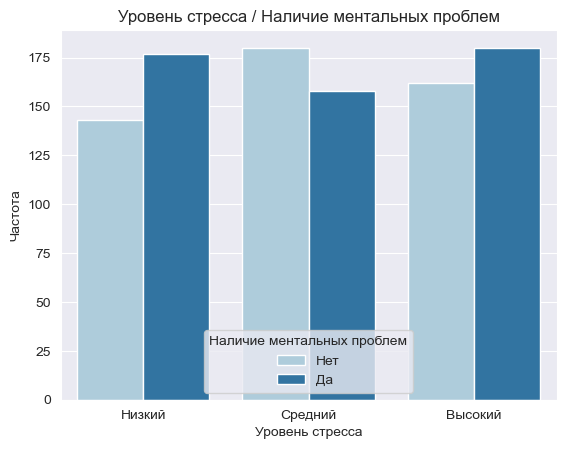

In [185]:
sns.countplot(x='Stress_Level', hue='Mental_Health_Condition', data=df, palette='Paired')
plt.title('Уровень стресса / Наличие ментальных проблем')
plt.xlabel('Уровень стресса')
plt.ylabel('Частота')
plt.xticks([0,1,2], ['Низкий', 'Средний', 'Высокий'])
plt.legend(title='Наличие ментальных проблем', labels=['Нет', 'Да'], loc='lower center')

На основании графика можно сделать вывод, что не всегда высокий уровень стресса является причиной ментальных проблем, он может быть и следствием, судя по тому, что среди людей с низким уровнем стресса тоже достаточно распространены психические проблемы. Средний уровень стресса может быть привычным многим людям и не вызывать ментальных проблем, так как количество людей без психических заболеваний в этой категории больше, чем число людей, испытывающих средний уровень стресса и определенные ментальные проблемы.

КТ-3 Корреляция. Задача регрессии или классификации

In [186]:
df.drop(columns=['User_ID']).corr(numeric_only=True).round(3)

,Age,Sleep_Hours,Work_Hours,Physical_Activity_Hours
Age,1.000,-0.043,-0.014,0.053
Sleep_Hours,-0.043,1.000,-0.006,-0.015
Work_Hours,-0.014,-0.006,1.000,0.039
Physical_Activity_Hours,0.053,-0.015,0.039,1.000


In [187]:
df.drop(columns=['User_ID']).corr(method="spearman", numeric_only=True)

,Age,Sleep_Hours,Work_Hours,Physical_Activity_Hours
Age,1.000000,-0.044811,-0.014494,0.052772
Sleep_Hours,-0.044811,1.000000,-0.005034,-0.015013
Work_Hours,-0.014494,-0.005034,1.000000,0.038711
Physical_Activity_Hours,0.052772,-0.015013,0.038711,1.000000


<Axes: >

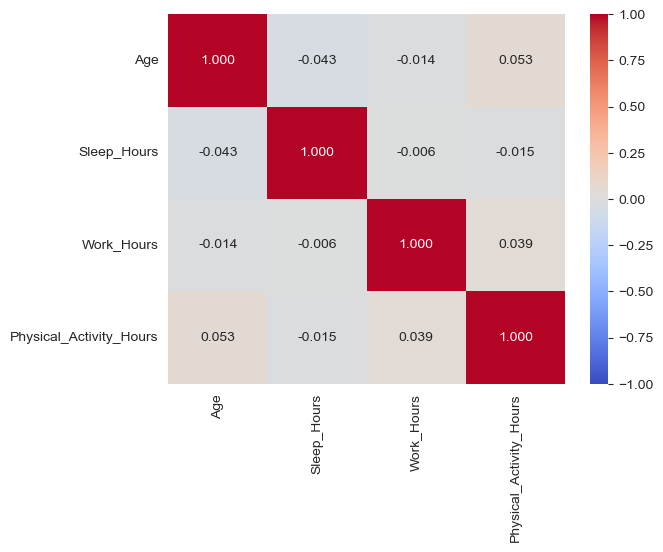

In [188]:
sns.heatmap(
    data=df.drop(columns=['User_ID']).corr(numeric_only=True),
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    annot=True,
    fmt=".3f")

r = 0.053 (признаки Age и Physical_Activity_Hours)

r>0: положительная (прямая) связь, но значение крайне близко к 0, зависимость практически отсутствует

|r|<0.3: очень слабая связь, практически отсутствует

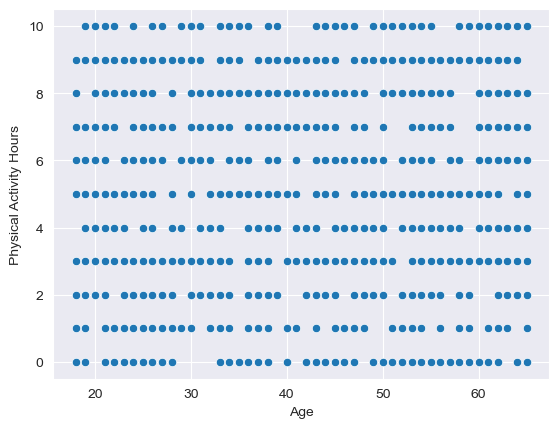

In [189]:
sns.scatterplot(data=df, x="Age", y="Physical_Activity_Hours")
plt.xlabel("Age")
plt.ylabel("Physical Activity Hours")
plt.show()

Диаграмма рассеяния подтверждает отсутствие зависимости

Логистическая регрессия (предсказание наличия ментального заболевания)

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours']]
y = df['Mental_Health_Condition'].map({'No': 0, 'Yes': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)
print(model.coef_)
print(model.intercept_.round(2))

[[ 0.00096708 -0.01986749  0.006012   -0.00018053]]
[-0.14]


Age (0.00096), Work_Hours (0.00601)
При увеличении взраста и рабочих часов вероятность того, что у челвека будет ментальное заболевание, будет увеличиваться, но незначительно (чем старше человек или чем больше он работает, тем выше стресс)

Sleep_Hours (-0.01987)
При уменьшении длительности сна (в часах) вероятность того, что у человека будет ментальное заболевание, будет увеличиваться (лучший сон может уменьшать психические проблемы)
Physical_Activity_Hours (-0.00018)
При уменьшении длительности физической активности (в часах) вероятность того, что у человека будет ментальное заболевание, будет увеличиваться (эффект минимален)

In [191]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score, roc_curve

y_pred = model.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("F1 Score:", round(f1_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))

y_pred_proba = model.predict_proba(X_test)
print("log_loss:", log_loss(y_test, y_pred_proba))

print("ROC_AUC:", roc_auc_score(y_test, y_pred_proba[:, 1]))

Accuracy: 0.495
Recall: 0.847
F1 Score: 0.622
Precision: 0.491
log_loss: 0.6944406398762919
ROC_AUC: 0.5190076030412165


Оценка качества модели

Низкие значения accuracy, precision и ROC-AUC указывают на то, что модель не превосходит случайный выбор. Модель обладает плохой прогностической способностью.

Интерпретация метрик 

Accuracy = 0.495: Модель с точностью 49,5% делает верный прогноз, что меньше 50%

Precision = 0.491: Модель не надежна при классификации Positive семплов 

Recall = 0.847: Примерно 85% Positive выборок было корректно предсказано. Модель достаточно хорошо классифицирует представителей положительного класса.

Модель имеет достатосно высокий уровень recall метрики, но низкую percision, модель правильно определяет большинство positive семплов, но имеет много ложных срабатываний (классификаций Negative выборок как Positive)

F1 = 0.622: у модели естьп роблемы с достижением баланса между полнотой и точностью

Log_loss = 0.69: прогнозируемая вероятность достаточно сильно отклоняется от фактического значения

ROC_AUC: 0.52: показатель практически равен 0.5, практически не лучше случайного угадывания 
